In [ ]:
Is a certain type of wine (red or white) associated with higher quality?
Do wines with higher alcoholic content receive better ratings?
Do sweeter wines (more residual sugar) receive better ratings?
What level of acidity is associated with the highest quality?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red=pd.read_csv("winequality-red.csv")
white=pd.read_csv("winequality-white.csv")



In [3]:
red.shape, white.shape

((1599, 12), (4898, 12))

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.0000,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [6]:
red.info(), white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                No

(None, None)

In [7]:
white.duplicated().sum()

937

In [8]:
red["quality"].nunique(), white["quality"].nunique()

(6, 7)

In [9]:
red['density'].mean()

1257.3569283302065

In [10]:
color_red = np.repeat("red",red.shape[0])
color_white = np.repeat("whie",white.shape[0])

In [11]:
red["color"]=color_red
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red


In [12]:
white["color"]=color_white
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1001.0000,3.00,0.45,8.8,6.0,whie
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,whie
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,whie
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,whie
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,whie


In [13]:
red=red.rename(columns = {'total_sulfur-dioxide':'total_sulfur_dioxide'})

In [14]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1.599000e+03,1599.000000
mean,8.319637,3.879687,0.270976,2.538806,0.087467,15.874922,46.467792,1257.356928,3.311113,0.658149,1.455285e+12,5.636023
std,1.741096,60.015370,0.194801,1.409928,0.047065,10.460157,32.895324,9784.883345,0.154386,0.169507,3.370300e+13,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990100,2.740000,0.330000,8.400000e+00,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000e+00,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996800,3.310000,0.620000,1.020000e+01,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997800,3.400000,0.730000,1.110000e+01,6.000000
max,15.900000,1185.000000,1.000000,15.500000,0.611000,72.000000,289.000000,100369.000000,4.010000,2.000000,9.566667e+14,8.000000


In [15]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000
mean,6.854788,0.483222,0.334192,6.391415,0.045772,35.308085,138.360657,570.852726,3.188267,0.489847,1.823234e+12,5.877909
std,0.843868,14.356450,0.121020,5.072058,0.021848,17.007137,42.498065,6918.444854,0.151001,0.114126,3.468549e+13,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987100,2.720000,0.220000,8.000000e+00,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991700,3.090000,0.410000,9.500000e+00,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,1.040000e+01,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,1.140000e+01,6.000000
max,14.200000,1005.000000,1.660000,65.800000,0.346000,289.000000,440.000000,103898.000000,3.820000,1.080000,9.733333e+14,9.000000


In [16]:
white = white[white["volatile acidity"] < 100]
white = white[white["density"] < 100]
white = white[white["alcohol"] < 100]


In [17]:
red = red[red["volatile acidity"] < 100]
red = red[red["density"] < 100]
red = red[red["alcohol"] < 100]



In [18]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,8.160185,0.526747,0.262353,2.447132,0.087056,15.839156,46.132498,0.996549,3.316882,0.655887,10.433322,5.640079
std,1.560862,0.177613,0.191117,1.179501,0.047791,10.335556,32.901447,0.001666,0.151839,0.170294,1.062201,0.805441
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990100,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.250000,2.200000,0.079000,14.000000,37.000000,0.996600,3.320000,0.620000,10.200000,6.000000
75%,9.000000,0.640000,0.410000,2.500000,0.089000,21.000000,62.000000,0.997600,3.400000,0.720000,11.100000,6.000000
max,15.900000,1.580000,1.000000,13.900000,0.611000,72.000000,289.000000,1.000000,4.010000,2.000000,14.900000,8.000000


In [20]:
wine_df = red.append(white)

# view dataframe to check for success
wine_df.head()

C:\Users\terri\AppData\Local\Temp\ipykernel_9748\2889496531.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine_df = red.append(white)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red


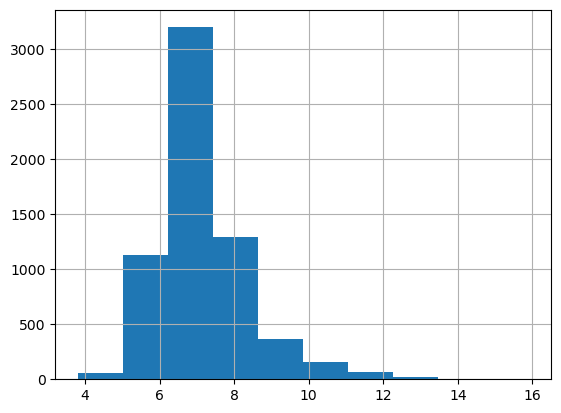

In [21]:
wine_df["fixed acidity"].hist();

<Axes: >

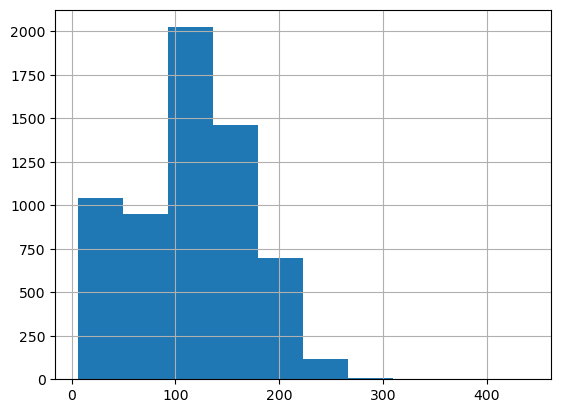

In [22]:
wine_df["total sulfur dioxide"].hist()

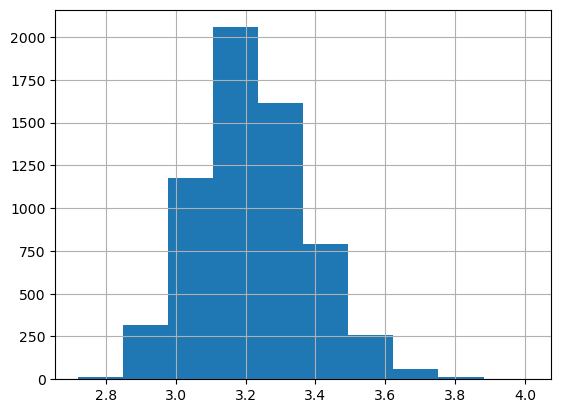

In [23]:
wine_df['pH'].hist();


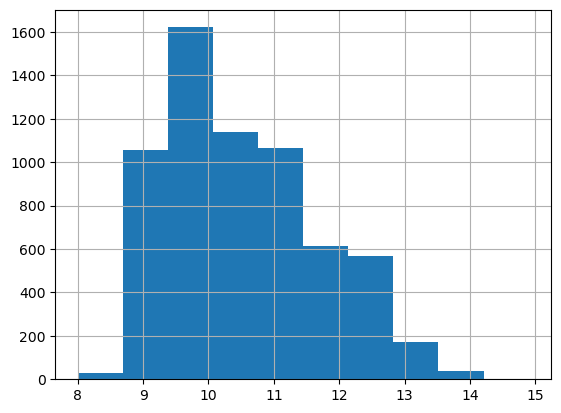

In [24]:
wine_df['alcohol'].hist();


In [ ]:
Fixed acidity and alcohol are skewed to the right

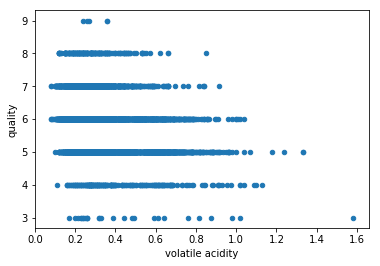

In [209]:
wine_df.plot(y="quality",x="volatile acidity",kind="scatter")

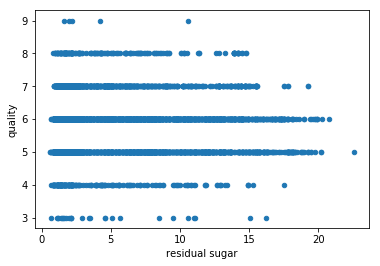

In [210]:
wine_df.plot(y='quality', x='residual sugar', kind='scatter');

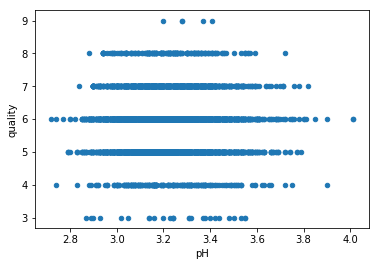

In [211]:
wine_df.plot(y='quality', x='pH', kind='scatter');


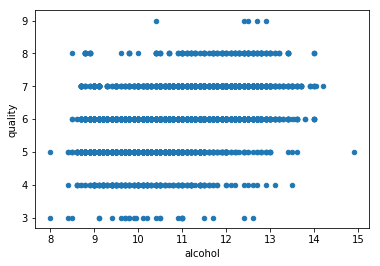

In [212]:
wine_df.plot(y='quality', x='alcohol', kind='scatter');


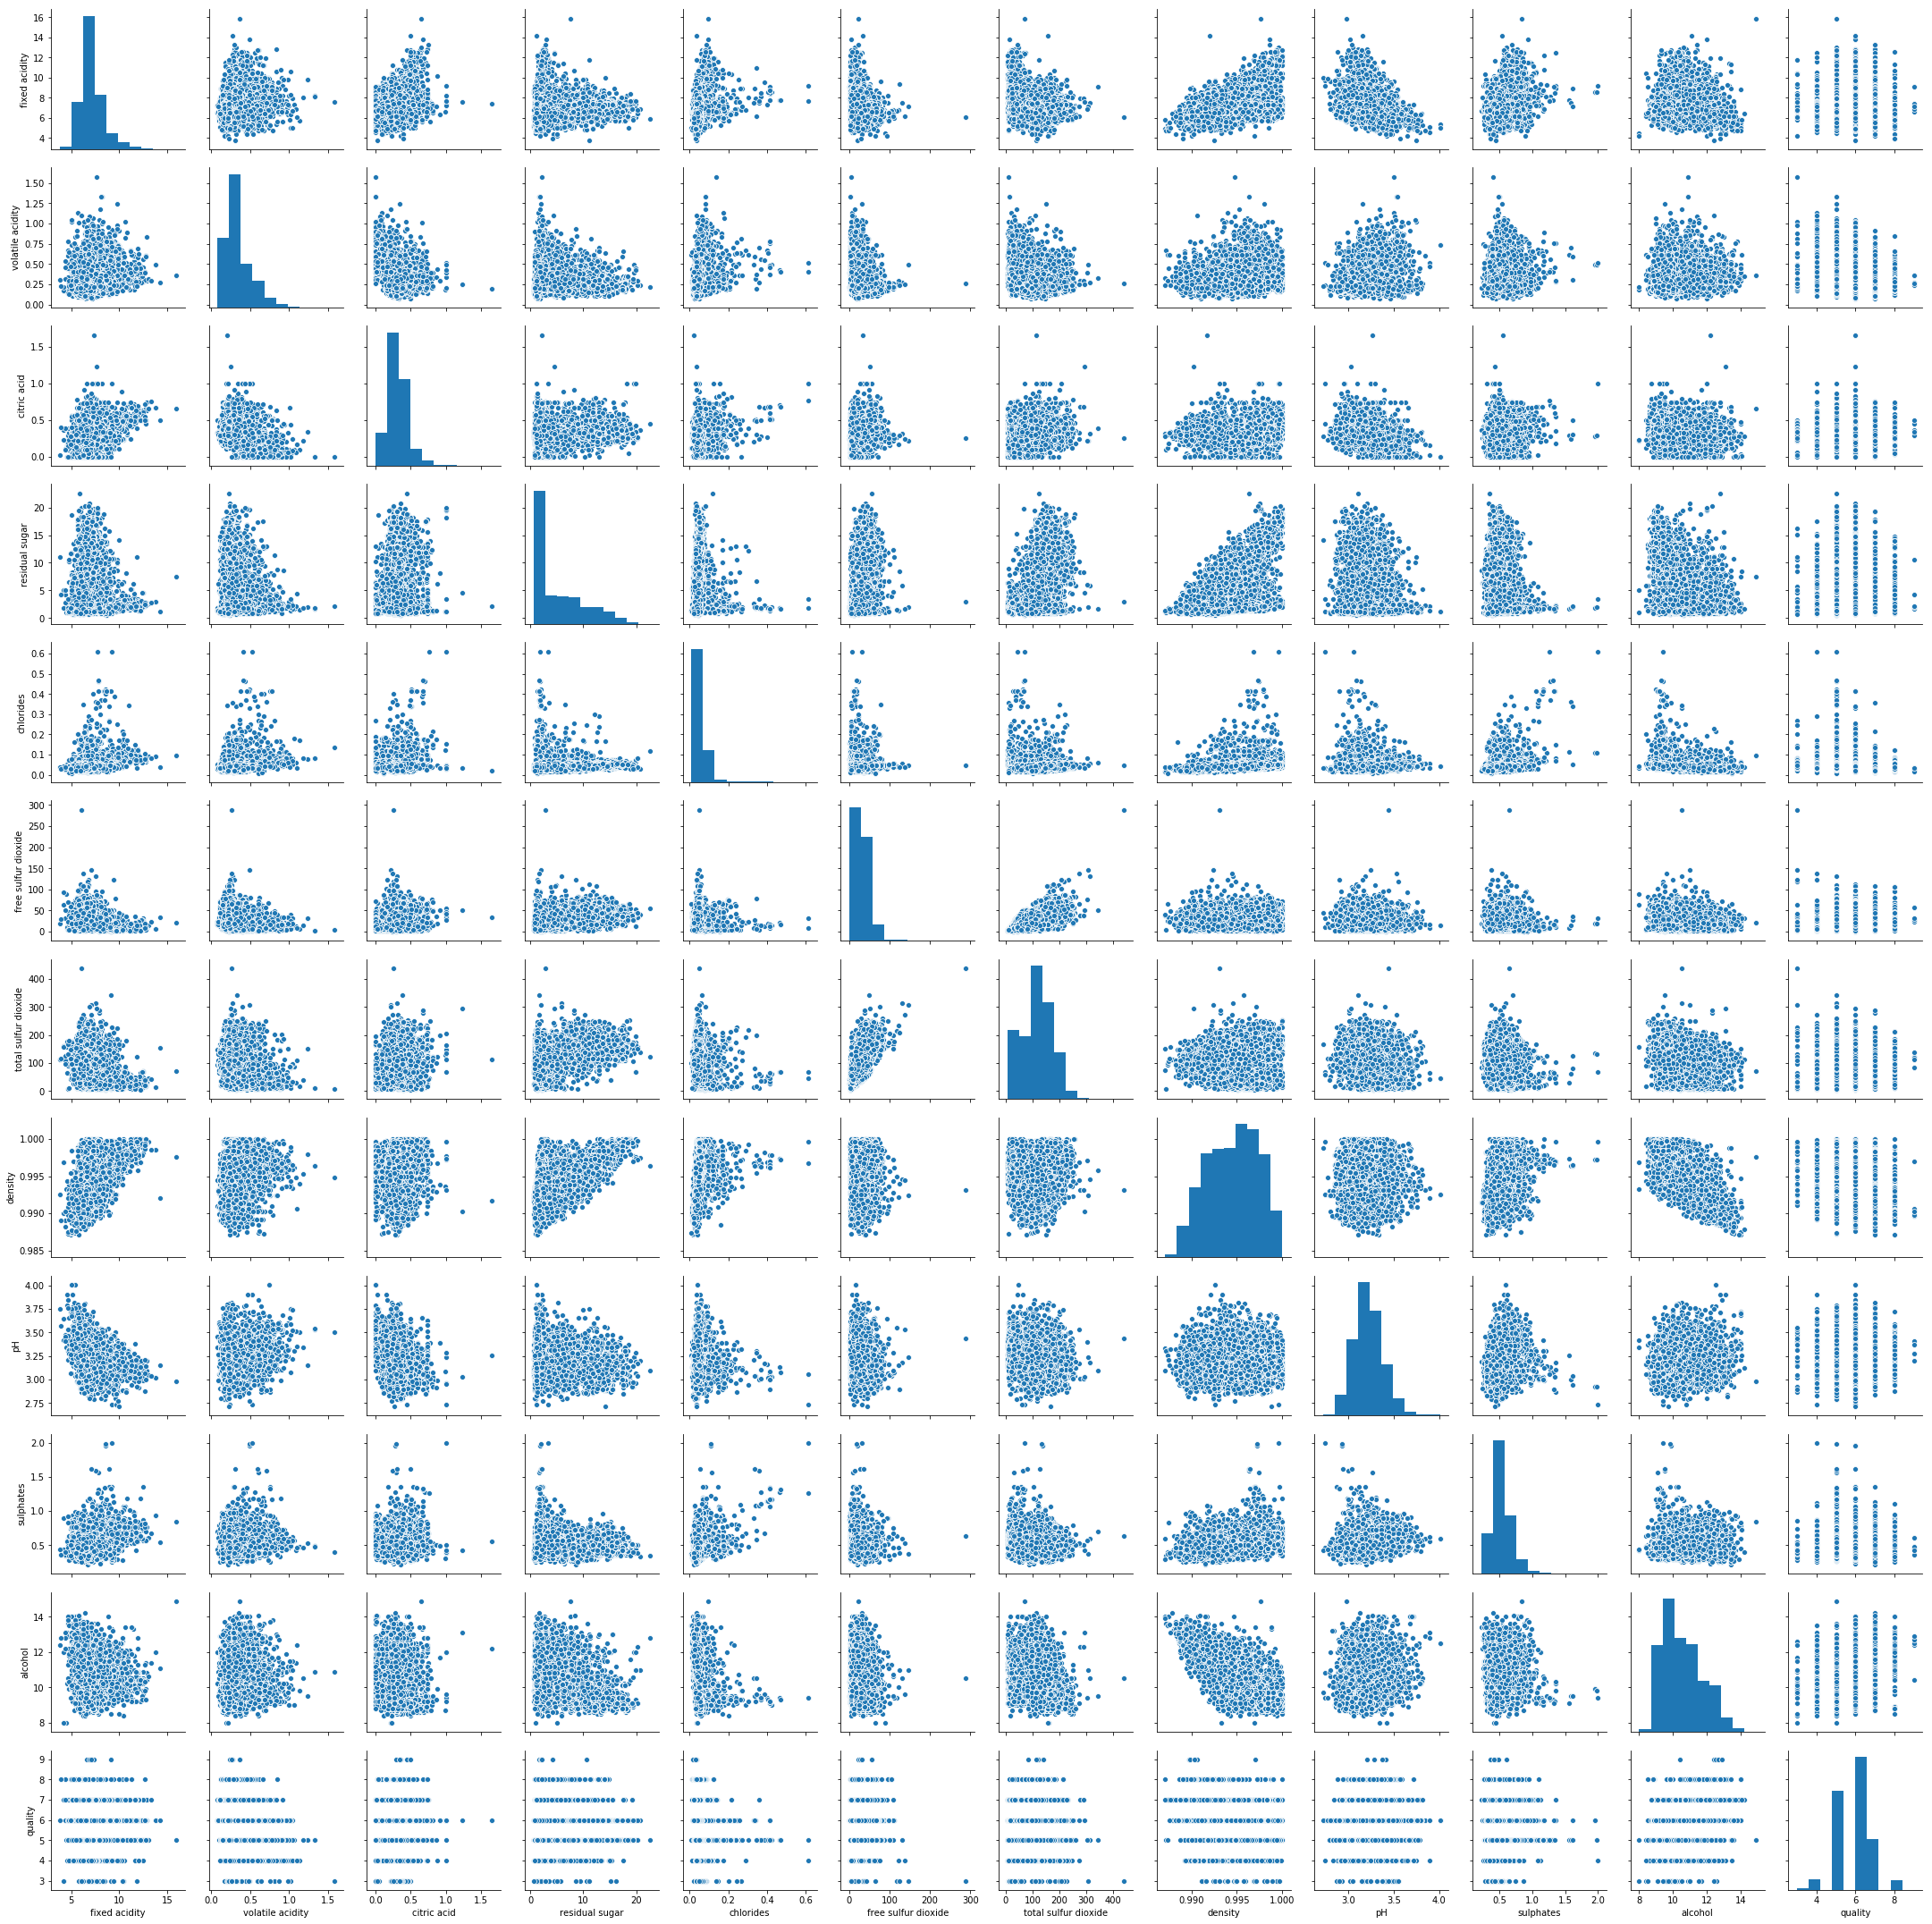

In [216]:
sns.pairplot(data=wine_df)

C:\Users\terri\AppData\Local\Temp\ipykernel_9748\2846512752.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =wine_df.corr()


Text(0.5, 1.0, 'Heatmap of Correlation COefficient for wine feature variables')

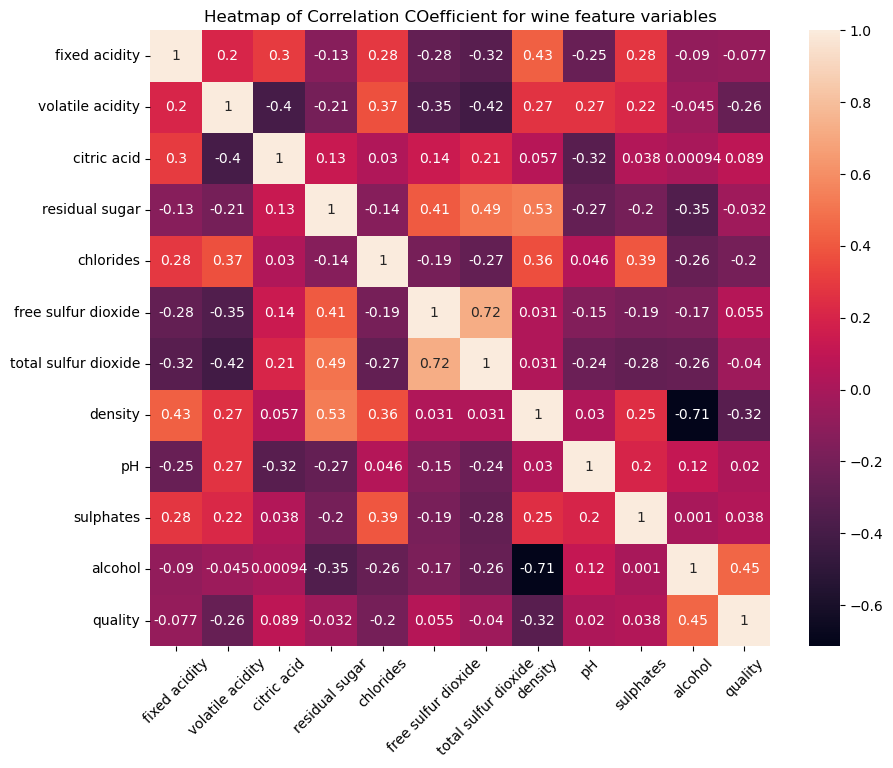

In [25]:
corr =wine_df.corr()
plt.figure(figsize=[10,8])
sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of Correlation COefficient for wine feature variables")

In [26]:
wine_df.groupby('color')['quality'].mean()

color
red     5.640079
whie    5.882599
Name: quality, dtype: float64

In [27]:
White wine is associated with higher quality

SyntaxError: invalid syntax (2341904351.py, line 1)

In [52]:
wine_df["pH"].describe()

count    6304.000000
mean        3.219829
std         0.160743
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [53]:
bin_edges=[2.72,3.11,3.21,3.32,4.01]

In [54]:
bin_names = ["high","moderately high","medium","low"]

In [55]:
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bins=bin_edges, labels=bin_names)


In [56]:
wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,moderately high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red,moderately high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,low


In [57]:
wine_df.groupby('acidity_levels')['quality'].mean()

acidity_levels
high               5.787934
moderately high    5.787234
medium             5.858179
low                5.867571
Name: quality, dtype: float64

In [ ]:
The lower acidity level has a better average rating

In [31]:
wine_df['alcohol'].median()


10.3

In [32]:
low_alcohol = wine_df.query("alcohol < 10.3")
high_alcohol = wine_df.query("alcohol >= 10.3")


In [33]:
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [34]:
low_alcohol["quality"].mean()

5.4735632183908045

In [35]:
high_alcohol["quality"].mean()

6.151887081926971

In [36]:
wine_df["residual sugar"].mean()

5.30234771573604

In [41]:
wine_df.rename(columns={"residual sugar":"residual_sugar"},inplace=True)

In [42]:
low_sugar = wine_df.query('residual_sugar < 5.3')

In [43]:
wine_df.rename(columns={"residual sugar":"residual_sugar"},inplace=True)


In [44]:
high_sugar=wine_df.query("residual_sugar >= 5.3")

In [45]:
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True


True

In [46]:
low_sugar["quality"].mean()

5.850715746421268

In [47]:
high_sugar["quality"].mean()

5.780936454849498

In [ ]:
The high sugar is the one with higher rating

In [48]:
median = wine_df["alcohol"].median()
low = wine_df.query("alcohol < {}".format(median))
high = wine_df.query("alcohol >= {}".format(median))
mean_quality_low_alcohol = low["quality"].mean()
mean_quality_high_alcohol = high["quality"].mean()

Text(0, 0.5, 'Average Quality Rating')

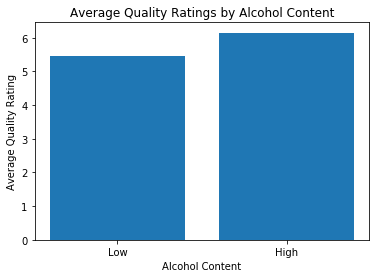

In [49]:
locations = [1,2]
heights = [mean_quality_low_alcohol, mean_quality_high_alcohol]
labels = ["Low", "High"]
plt.bar(locations,heights,tick_label=labels)
plt.title("Average Quality Ratings by Alcohol Content")
plt.xlabel("Alcohol Content")
plt.ylabel("Average Quality Rating")

In [49]:
median = wine_df["residual_sugar"].median()
low_sugar = wine_df.query("residual_sugar < {}".format(median))
high_sugar = wine_df.query("residual_sugar >= {}".format(median))
mean_quality_low_sugar = low_sugar["quality"].mean()
mean_quality_high_sugar = high_sugar["quality"].mean()

Text(0, 0.5, 'Average Quality Rating')

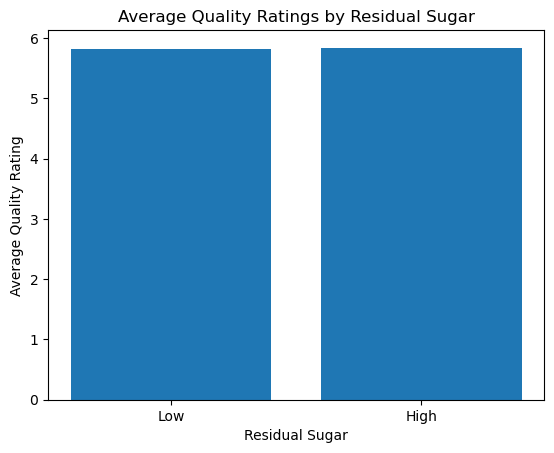

In [50]:
locations = [1,2]
heights = [mean_quality_low_sugar,mean_quality_high_sugar]
labels = ["Low", "High"]

plt.bar(locations, heights, tick_label = labels)
plt.title("Average Quality Ratings by Residual Sugar")
plt.xlabel("Residual Sugar")
plt.ylabel("Average Quality Rating")

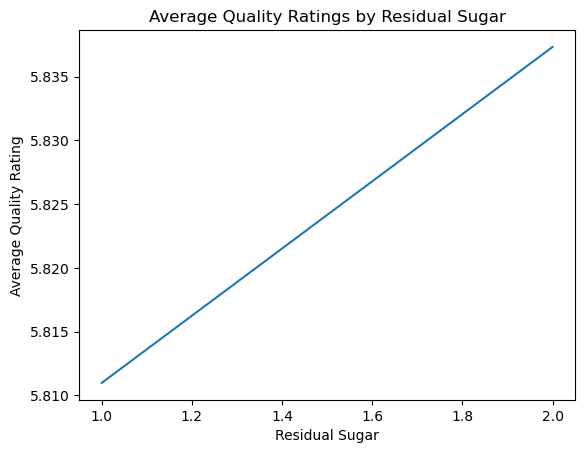

In [51]:
locations = [1,2]
heights =  [mean_quality_low_sugar, mean_quality_high_sugar]
plt.plot(locations, heights)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

In [54]:
acidity_level_mean = wine_df.groupby('acidity_levels')['quality'].mean()
acidity_level_mean

acidity_levels
high               5.787934
moderately high    5.787234
medium             5.858179
low                5.867571
Name: quality, dtype: float64

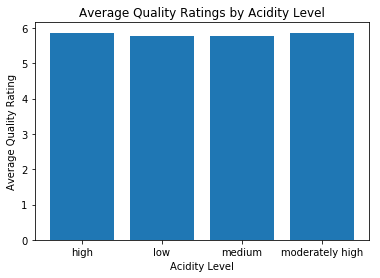

In [55]:
locations = [2,3,4,1]
heights = acidity_level_mean
labels = ['low','medium','moderately high','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

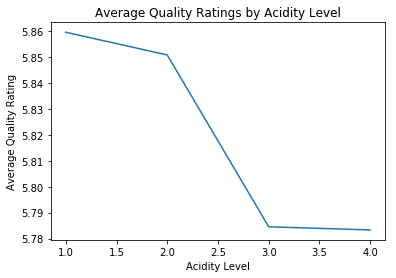

In [56]:
locations = [1,2,3,4]
heights = [5.859593, 5.850832, 5.784540, 5.783343]
plt.plot(locations, heights)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

In [ ]:
Is a certain type of wine (red or white) associated with higher quality?
R: Yes, white wine is associated with a higher quality
Do wines with higher alcoholic content receive better ratings?
R: Yes, as seen in the charts
Do sweeter wines (more residual sugar) receive better ratings?
R: Yes as seen in the charts
What level of acidity is associated with the highest quality?
R: An acidity level of low